In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
features = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Walmart/features.csv")
train = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Walmart/train.csv")
stores = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Walmart/stores.csv")
test1 = pd.read_csv("C:/Users/Pritam Laskar/Documents/Projects/Walmart/test.csv")

# Data Cleaning

In [3]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
# Merge in one df:

df1 = train.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
df = df1.merge(stores, on = ['Store'], how = 'inner')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [7]:
test1.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Train Data

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(421570, 16)

In [10]:
(df.isnull().sum()/len(df))*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.257181
MarkDown2       73.611025
MarkDown3       67.480845
MarkDown4       67.984676
MarkDown5       64.079038
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
dtype: float64

In [11]:
# We will drop the Markdown columns as they have null values over 30%:

df.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis = 1, inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   CPI           421570 non-null  float64
 8   Unemployment  421570 non-null  float64
 9   Type          421570 non-null  object 
 10  Size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


In [13]:
df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [14]:
df['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(keys = "Date", inplace = True)

In [16]:
df['Weekly_Sales'].dtype

dtype('float64')

In [17]:
df['IsHoliday'].value_counts()

False    391909
True      29661
Name: IsHoliday, dtype: int64

In [18]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,14.313000,219622.000000


In [19]:
# Removing Outliers:

columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']

Q3 = df[columns].quantile(.75)
Q1 = df[columns].quantile(.25)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 -  1.5*IQR

for column in columns:
    df[column] = np.where(df[column] > UL[column], UL[column], np.where(df[column] < LL[column], LL[column], df[column]))

In [20]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.091260,3.361027,171.201947,7.831783,136727.915739
std,12.785297,30.492054,22711.183519,18.444122,0.458515,39.159276,1.497917,60980.583328
min,1.000000,1.000000,-4988.940000,5.280000,2.472000,126.064000,4.369500,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,227.232807,11.093500,219622.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  object 
 9   Size          421570 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(1)
memory usage: 32.6+ MB


In [22]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315.0
2010-02-05,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315.0


## Test Data

In [23]:
test1.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [24]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [25]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [26]:
df_test = test1.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'inner')
test = df_test.merge(stores, on = ['Store'], how = 'inner')

In [27]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [28]:
test.drop(axis = 1, columns = ["MarkDown1", "MarkDown2","MarkDown3","MarkDown4", "MarkDown5"], inplace = True)

In [29]:
(test.isnull().sum()/len(test))*100

Store            0.00000
Dept             0.00000
Date             0.00000
IsHoliday        0.00000
Temperature      0.00000
Fuel_Price       0.00000
CPI             33.16589
Unemployment    33.16589
Type             0.00000
Size             0.00000
dtype: float64

In [30]:
test.dropna(inplace = True)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76902 entries, 0 to 114194
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         76902 non-null  int64  
 1   Dept          76902 non-null  int64  
 2   Date          76902 non-null  object 
 3   IsHoliday     76902 non-null  bool   
 4   Temperature   76902 non-null  float64
 5   Fuel_Price    76902 non-null  float64
 6   CPI           76902 non-null  float64
 7   Unemployment  76902 non-null  float64
 8   Type          76902 non-null  object 
 9   Size          76902 non-null  int64  
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 5.9+ MB


In [32]:
test['Date'] = pd.to_datetime(test['Date'])
test.set_index(keys = 'Date', inplace = True)
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [33]:
test.shape

(76902, 9)

In [34]:
test.duplicated().sum()

0

# Converting Categorical Data to Numerical

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['IsHoliday'] = encoder.fit_transform(df['IsHoliday'])
df['Type'] = encoder.fit_transform(df['Type'])
test['IsHoliday'] = encoder.fit_transform(test['IsHoliday'])

In [36]:
test['Type'] = encoder.fit_transform(test['Type'])

In [37]:
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int32
Size            float64
dtype: object

In [38]:
test.dtypes

Store             int64
Dept              int64
IsHoliday         int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Type              int32
Size              int64
dtype: object

In [39]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,2,50605.27,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,3,13740.12,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,4,39954.04,0,42.31,2.572,211.096358,8.106,0,151315.0
2010-02-05,1,5,32229.38,0,42.31,2.572,211.096358,8.106,0,151315.0


In [40]:
df['CPI'] = df['CPI'].round(2)

In [41]:
test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,
2012-11-02,1,1,0,55.32,3.386,223.462779,6.573,0,151315
2012-11-02,1,2,0,55.32,3.386,223.462779,6.573,0,151315
2012-11-02,1,3,0,55.32,3.386,223.462779,6.573,0,151315
2012-11-02,1,4,0,55.32,3.386,223.462779,6.573,0,151315
2012-11-02,1,5,0,55.32,3.386,223.462779,6.573,0,151315


# Checking Multicollinearity

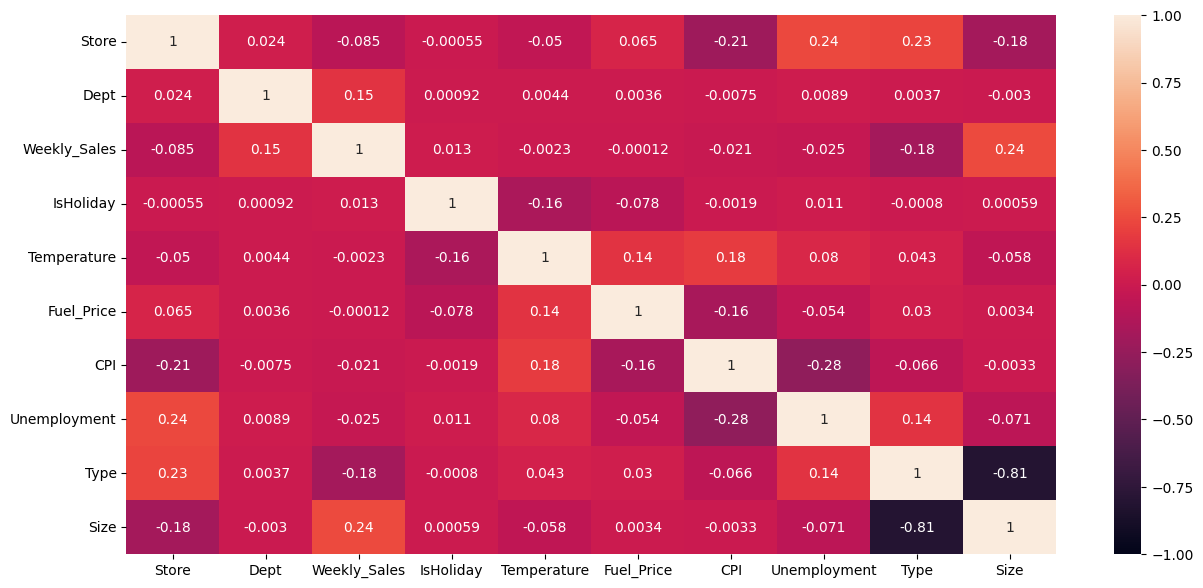

In [42]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

We can see multicollinearity exists between Type and Size as correlation is above 0.75. To decide which one to drop, we will call VIF.

# Removing Multicollinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Features'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data


,Features,VIF
0,Store,4.556908
1,Dept,3.151310
2,Weekly_Sales,1.635615
3,IsHoliday,1.102028
4,Temperature,13.114620
5,Fuel_Price,34.664951
6,CPI,15.993707
7,Unemployment,24.668334
8,Type,4.981511
9,Size,16.003423


In [44]:
# As Size has higher VIF between Type and Size, we will drop Size

df.drop(['Size'], axis = 1, inplace = True)

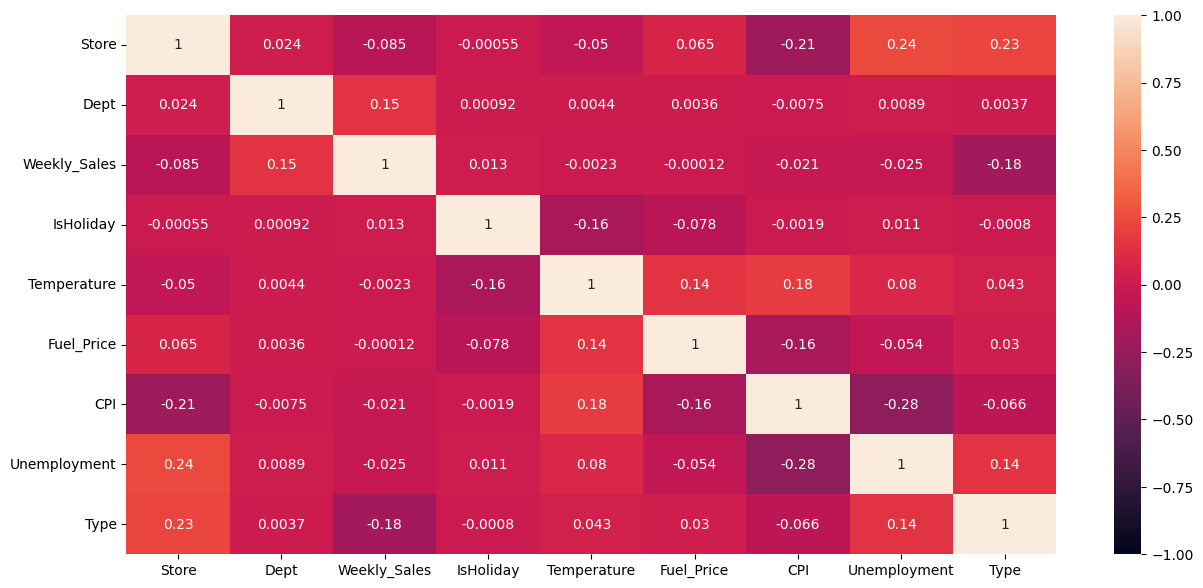

In [45]:
# Now we will call heatmapt again to see multicollinearity

plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True);

As we don't have correlation over .75, our data has reduced multicollinearity upto a significant extent and we can go ahead with further processing.

# Train Test Split

In [46]:
# df.reset_index(inplace = True)
# test.reset_index(inplace = True)

In [47]:
x = df.drop(['Weekly_Sales'], axis = 1)
y = df['Weekly_Sales']

In [48]:
x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type'],
      dtype='object')

In [49]:
y.head()

Date
2010-02-05    24924.50
2010-02-05    50605.27
2010-02-05    13740.12
2010-02-05    39954.04
2010-02-05    32229.38
Name: Weekly_Sales, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [51]:
print("x Train Shape :",x_train.shape)
print("x Val Shape   :",x_val.shape)
print("y Train Shape :",y_train.shape)
print("y Val Shape   :",y_val.shape)

x Train Shape : (295099, 8)
x Val Shape   : (126471, 8)
y Train Shape : (295099,)
y Val Shape   : (126471,)


In [52]:
x.columns

Index(['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Type'],
      dtype='object')

### Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_val)

In [54]:
lr.score(x_val, y_val)

0.06149084741656563

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_pred, y_val)
r2 = r2_score(y_pred, y_val)
print('Mean Square Error = ', mse)
print('R2 Score = ', r2)

Mean Square Error =  483013587.3134137
R2 Score =  -14.759850236179574


### Decision Tree Regression

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [57]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_val)

In [58]:
rms_dt = np.sqrt(mean_squared_error(y_pred_dt, y_val))
r2_dt = r2_score(y_pred_dt, y_val)
print('RMSE of DT = ', rms_dt)
print('R2 Score of DT = ', r2_dt)

RMSE of DT =  7780.147952205831
R2 Score of DT =  0.8862207440034116


### Random Forest Regression

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf = RandomForestRegressor()
rf_model = rf.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_val)

In [61]:
rms_rf = np.sqrt(mean_squared_error(y_pred_rf, y_val))
r2_rf = r2_score(y_pred_rf, y_val)
print('RMSE of RF = ', rms_rf)
print('R2 Score of RF = ', r2_rf)

# Conclusion

We have found that our best model is Random Forest Regressor where we have a R2 Scroe of 0.93.